# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='tmdl-sd'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
program,string,
parentproject,string,
project,string,
stationname,string,
stationcode,string,
sampledate,date,
collectiontime,time,
locationcode,string,
collectiondepth,integer,
unitcollectiondepth,string,


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,program,parentproject,project,stationname,stationcode,sampledate,collectiontime,locationcode,collectiondepth,unitcollectiondepth,...,regional_board,rb_number,huc8,huc8_number,huc10,huc10_number,huc12,huc12_number,waterbody_type,sampleid
0,Total Maximum Daily Load,Bacteria TMDL 20 Beaches and Creeks,Chollas Creek Bacteria TMDL,Chollas Creek North Fork MLS,SD8(1),2015-10-20,2018-08-02 11:08:00,Not Recorded,-88,m,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Maximum Daily Load,Bacteria TMDL 20 Beaches and Creeks,Chollas Creek Bacteria TMDL,Chollas Creek North Fork MLS,SD8(1),2015-10-20,2018-08-02 11:08:00,Not Recorded,-88,m,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Maximum Daily Load,Bacteria TMDL 20 Beaches and Creeks,Chollas Creek Bacteria TMDL,Chollas Creek North Fork MLS,SD8(1),2015-11-04,2018-08-02 11:45:00,Not Recorded,-88,m,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total Maximum Daily Load,Bacteria TMDL 20 Beaches and Creeks,Chollas Creek Bacteria TMDL,Chollas Creek North Fork MLS,SD8(1),2015-11-04,2018-08-02 11:45:00,Not Recorded,-88,m,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total Maximum Daily Load,Bacteria TMDL 20 Beaches and Creeks,Chollas Creek Bacteria TMDL,Chollas Creek North Fork MLS,SD8(1),2015-12-29,2018-08-02 10:05:00,Not Recorded,-88,m,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,25
const,16
datetime,2
number,7
other,29


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0,1126,17235
program,Total Maximum Daily Load,Total Maximum Daily Load,Total Maximum Daily Load
locationcode,Not Recorded,Not Recorded,Not Recorded
collectionreplicate,1,1,1
resultsreplicate,1,1,1
collectioncomments,NaN,,NaN
eventcode,WQ,WQ,WQ
protocolcode,Not Recorded,Not Recorded,Not Recorded
calibrationdate,0000-00-00,0000-00-00,0000-00-00
preppreservationdate,0000-00-00 00:00:00,0000-00-00 00:00:00,0000-00-00 00:00:00
digestextractdate,0000-00-00,0000-00-00,0000-00-00


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

,0
observation,NaN
groupsamples,NaN
occupationmethod,NaN
startingbank,NaN
distancefrombank,NaN
unitdistancefrombank,NaN
streamwidth,NaN
unitstreamwidth,NaN
stationwaterdepth,NaN
unitstationwaterdepth,NaN


# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32460 entries, 0 to 32459
Data columns (total 2 columns):
sampledate        32460 non-null datetime64[ns]
collectiontime    32460 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 507.3 KB


None

,count,unique,top,freq,first,last
sampledate,32460,471,2008-05-08 00:00:00,247,1950-01-01 00:00:00,2017-09-15 00:00:00
collectiontime,32460,256,2018-08-02 10:30:00,1211,2018-08-02 00:00:00,2018-08-02 16:00:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32460 entries, 0 to 32459
Data columns (total 7 columns):
collectiondepth    32460 non-null int64
result             31273 non-null float64
mdl                15981 non-null float64
rl                 15981 non-null float64
targetlatitude     32460 non-null float64
targetlongitude    32460 non-null float64
dilutionfactor     15981 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.7 MB


None

,count,mean,std,min,25%,50%,75%,max
collectiondepth,32460.0,-86.625508,10.911907,-88.000000,-88.000000,-88.000000,-88.000000,0.000000e+00
result,31273.0,1714.296231,13652.924744,-50.000000,0.540000,6.090000,18.500000,1.600000e+06
mdl,15981.0,-14.230447,134.026918,-88.000000,0.001000,0.016800,0.300000,1.000000e+04
rl,15981.0,14.544573,153.505277,0.010000,0.050000,1.000000,2.500000,1.000000e+04
targetlatitude,32460.0,33.253330,0.261877,32.691292,32.974701,33.408588,33.411739,3.342964e+01
targetlongitude,32460.0,-117.190069,0.056782,-117.391998,-117.214767,-117.198769,-117.152039,-1.169857e+02
dilutionfactor,15981.0,8.012173,120.543786,1.000000,1.000000,1.000000,2.000000,1.000000e+04


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


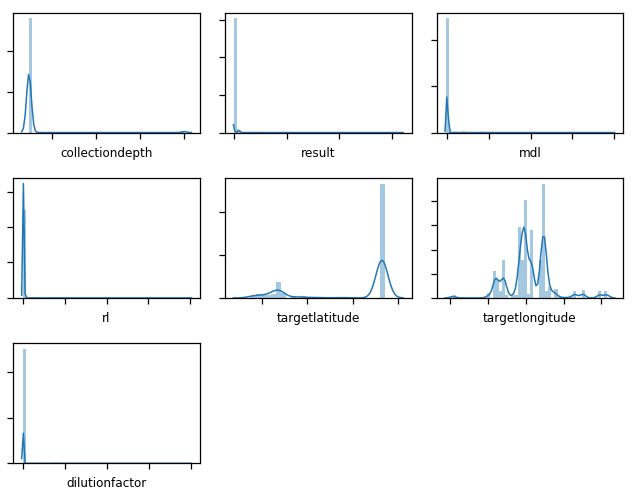

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

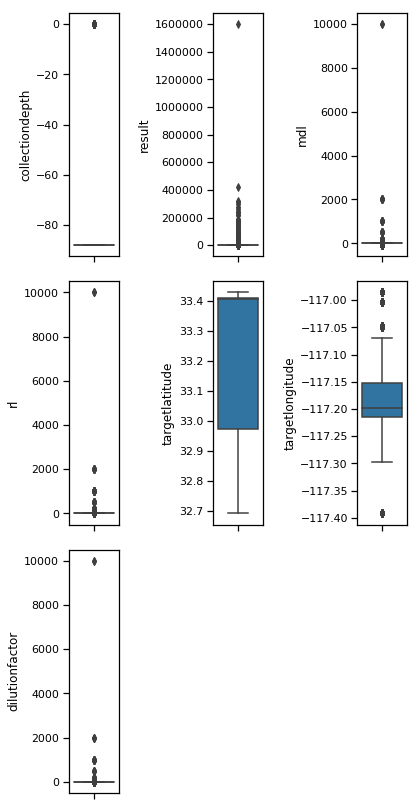

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

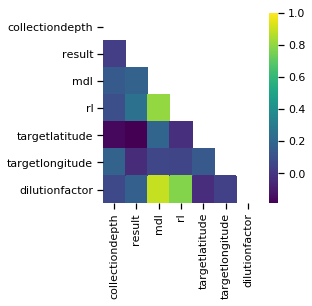

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32460 entries, 0 to 32459
Data columns (total 29 columns):
parentproject                  32460 non-null object
project                        32460 non-null object
stationname                    32460 non-null object
stationcode                    32460 non-null object
unitcollectiondepth            32460 non-null object
sampletypecode                 32460 non-null object
labbatch                       15981 non-null object
labsampleid                    15945 non-null object
matrixname                     32460 non-null object
methodname                     32460 non-null object
analyte                        32460 non-null object
unit                           32460 non-null object
resultqualcode                 32451 non-null object
qacode                         32460 non-null object
batchverification              32460 non-null object
compliancecode                 32460 non-null object
samplecomments                 10922 non-nu

None

,count,unique,top,freq
parentproject,32460,5,Nutrient TMDL for Santa Margarita Watershed,23554
project,32460,12,Nutrient TMDL for Santa Margarita Watershed,23204
stationname,32460,51,Rainbow Creek @ Stage Coach Lane,2295
stationcode,32460,51,SMG06,2295
unitcollectiondepth,32460,2,m,21197
sampletypecode,32460,3,Not Recorded,16479
labbatch,15981,1659,CO_TMDL_01-29Sep16,75
labsampleid,15945,2693,SDR FC1 G01,359
matrixname,32460,2,samplewater,32108
methodname,32460,35,FieldMeasure,16479


# Nulls


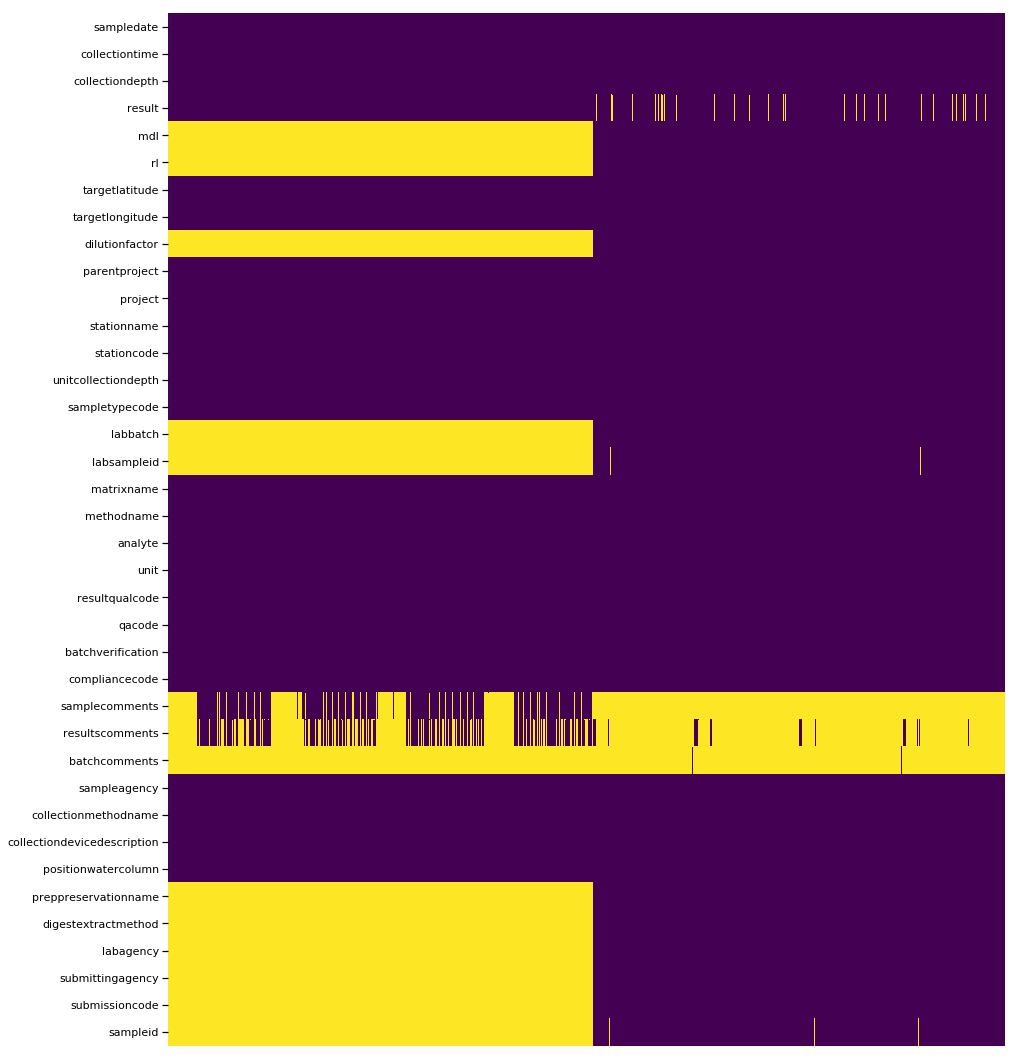

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )